----------------------------------------------------
 Neural Network (MLP) Model Performance
----------------------------------------------------
Accuracy: 0.9156

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       785
           1       0.80      0.75      0.77       187

    accuracy                           0.92       972
   macro avg       0.87      0.85      0.86       972
weighted avg       0.91      0.92      0.91       972


Feature Importances:
    Feature  Importance
17      WAB    0.132099
3   BARTHAG    0.076337
0         W    0.076235
1     ADJOE    0.050720
2     ADJDE    0.036626
6       TOR    0.017490
5     EFG_D    0.010905
15     3P_D    0.010494
9       DRB    0.010185
12     2P_O    0.009877
4     EFG_O    0.009465
10      FTR    0.008848
16    ADJ_T    0.008745
13     2P_D    0.008436
14     3P_O    0.008025
8       ORB    0.006584
7      TORD    0.004527
11     FTRD    0.004218


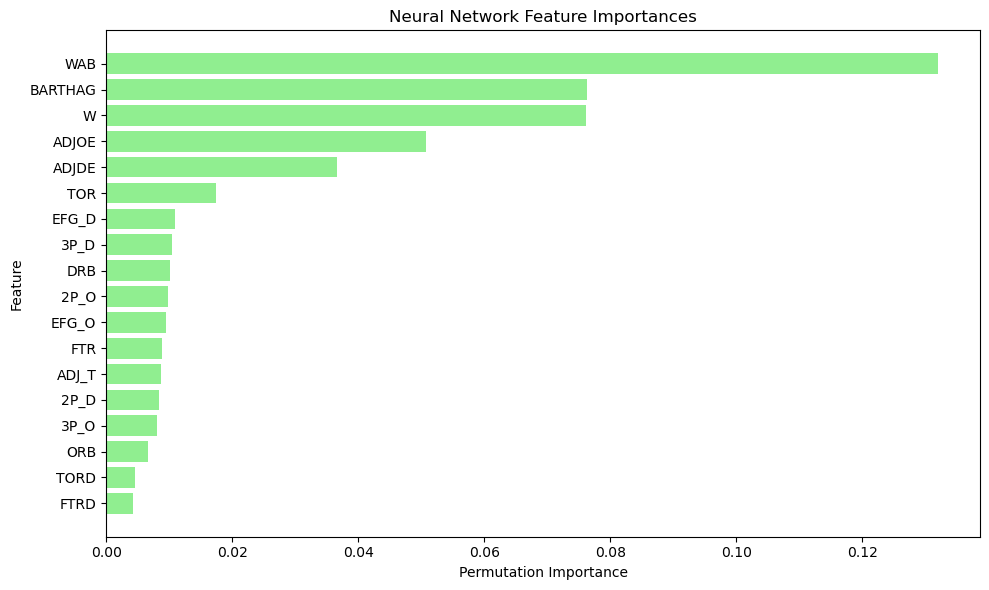

In [1]:
# ---------------------------------------------------------
# Model 3: Neural Network (MLP) for March Madness Prediction
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

# ---------------------------------------------------------
# 1. Load Data
# ---------------------------------------------------------
df = pd.read_csv('/home/lambjos3/cmse492_project/data/raw/cbb.csv')

# ---------------------------------------------------------
# 2. Encode POSTSEASON Target Variable
# ---------------------------------------------------------
def convert_postseason(x):
    if pd.isna(x) or x in ["", "R1", "R2"]:
        return 0
    else:
        return 1

df["POSTSEASON_BINARY"] = df["POSTSEASON"].apply(convert_postseason)
y = df["POSTSEASON_BINARY"]

# ---------------------------------------------------------
# 3. Feature Selection
# ---------------------------------------------------------
features = [
    "W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D",
    "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD",
    "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"
]

X = df[features]

# ---------------------------------------------------------
# 4. Train/Test Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 5. Scale Features
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 6. Train MLP Classifier
# ---------------------------------------------------------
mlp_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

# ---------------------------------------------------------
# 7. Evaluate Model
# ---------------------------------------------------------
y_pred = mlp_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("----------------------------------------------------")
print(" Neural Network (MLP) Model Performance")
print("----------------------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(report)

# ---------------------------------------------------------
# 8. Feature Importance via Permutation Importance
# ---------------------------------------------------------
perm_importance = permutation_importance(
    mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42
)

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)

# ---------------------------------------------------------
# 9. Plot Feature Importances
# ---------------------------------------------------------
fig_dir = '/home/lambjos3/cmse492_project/figures'
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Neural Network Feature Importances')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'neural_network.png'))
plt.show()